## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [21]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [22]:
train, test = keras.datasets.cifar10.load_data()

In [23]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*( (x-np.min(x)) / (np.max(x)-np.min(x))-0.5 )
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [24]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [25]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128, 64, 32])
model.summary()

W0811 18:32:17.860601  9576 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 18:32:17.909601  9576 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 18:32:17.940801  9576 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [26]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [27]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0811 18:32:18.089801  9576 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 18:32:18.102801  9576 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [28]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0811 18:32:18.235001  9576 deprecation.py:323] From C:\Users\Francis\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 18:32:18.325001  9576 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 280us/step - loss: 1.7162 - acc: 0.3918 - val_loss: 1.5590 - val_acc: 0.4449
Epoch 2/100
50000/50000 [==============================] - 12s 240us/step - loss: 1.4893 - acc: 0.4737 - val_loss: 1.4454 - val_acc: 0.4936
Epoch 3/100
50000/50000 [==============================] - 13s 268us/step - loss: 1.3678 - acc: 0.5179 - val_loss: 1.4145 - val_acc: 0.4996
Epoch 4/100
50000/50000 [==============================] - 13s 266us/step - loss: 1.2749 - acc: 0.5499 - val_loss: 1.3870 - val_acc: 0.5142
Epoch 5/100
50000/50000 [==============================] - 11s 220us/step - loss: 1.1901 - acc: 0.5817 - val_loss: 1.3882 - val_acc: 0.5170
Epoch 6/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.1137 - acc: 0.6078 - val_loss: 1.3632 - val_acc: 0.5325
Epoch 7/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.0436 - acc: 0.6306 - val_l

Epoch 59/100
50000/50000 [==============================] - 10s 210us/step - loss: 0.1144 - acc: 0.9617 - val_loss: 3.5479 - val_acc: 0.5242
Epoch 60/100
50000/50000 [==============================] - 11s 211us/step - loss: 0.0948 - acc: 0.9693 - val_loss: 3.7452 - val_acc: 0.5334
Epoch 61/100
50000/50000 [==============================] - 11s 211us/step - loss: 0.0904 - acc: 0.9699 - val_loss: 3.6710 - val_acc: 0.5283
Epoch 62/100
50000/50000 [==============================] - 11s 211us/step - loss: 0.0993 - acc: 0.9674 - val_loss: 3.6344 - val_acc: 0.5332
Epoch 63/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.1013 - acc: 0.9669 - val_loss: 3.7459 - val_acc: 0.5316
Epoch 64/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.0870 - acc: 0.9717 - val_loss: 3.8385 - val_acc: 0.5294
Epoch 65/100
50000/50000 [==============================] - 11s 211us/step - loss: 0.1079 - acc: 0.9652 - val_loss: 3.8152 - val_acc: 0.5320
Epoch 66/100


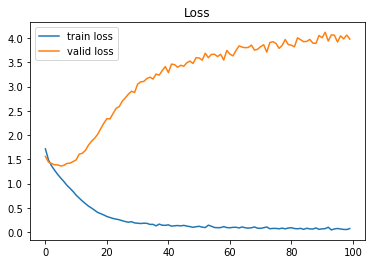

In [30]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

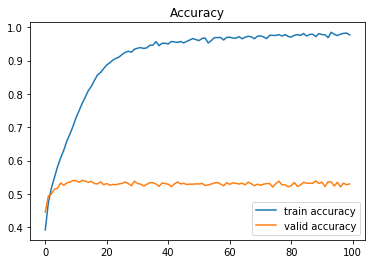

In [31]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()